In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

Imported all players stats from 1950-2017

In [3]:
pwd

'/Users/AlexMartinez/Desktop/Who-s-Better-MJ-or-Kobe-/notebooks'

In [4]:
Season_stats = pd.read_csv('../data/Seasons_Stats.csv')

In [5]:
# Because of the combined totals for certain players their stats were fluffed .
print(Season_stats.shape)
# Removed where those rows were
Season_stats.drop(Season_stats[Season_stats['Tm'] == 'TOT'].index, inplace = True) 
print(Season_stats.shape)


(24691, 53)
(22568, 53)


In [6]:
best_scores = Season_stats[['Player','PTS', 'FG','FG%','USG%','PER','3P%','2P%','3PAr','TS%','MP','FT%','OWS']]

The most poins and thier overall FG%

In [7]:
fg_tot = pd.DataFrame(best_scores.groupby('Player')['FG%'].mean())
score = pd.DataFrame(best_scores.groupby('Player')['PTS'].sum())
score = score.merge(fg_tot,on='Player')
score = score.sort_values(by='PTS',ascending=False).head(10)
score
# This table is innaccurate. There were 3 Eddie jhonsons who were comnbined into one player
# Because none of them individually would make it to top 10. We  can drop them from the table

score.drop('Eddie Johnson',inplace=True)
score = score.reset_index()

Created a function to strip the * character next to players name which indicated hall of fame status

In [8]:
def remove_star(string):
    if '*' in string:
        string = string.replace('*','')
    return string
    

In [9]:
score.Player = score.Player.map(remove_star)
score

,Player,PTS,FG%
0,Kareem Abdul-Jabbar,38387.0,0.558350
1,Karl Malone,36928.0,0.512895
2,Kobe Bryant,33643.0,0.441400
3,Michael Jordan,32292.0,0.488267
4,Wilt Chamberlain,31419.0,0.563000
5,Dirk Nowitzki,30260.0,0.468842
6,LeBron James,28787.0,0.503571
7,Shaquille O'Neal,28596.0,0.587150
8,Moses Malone,27409.0,0.470947


Simple Bar graph of players with the most points

Text(0, 0.5, 'Total Points')

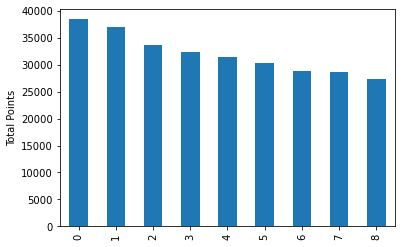

In [10]:
score['PTS'].plot.bar()
plt.ylabel('Total Points')

Points to FG%

In [14]:
from matplotlib import cm
from matplotlib import rc,rcParams
color = cm.magma_r(np.linspace(0.2,0.6,30))

In [15]:
color = cm.viridis_r(np.linspace(0.3,0.9,15))

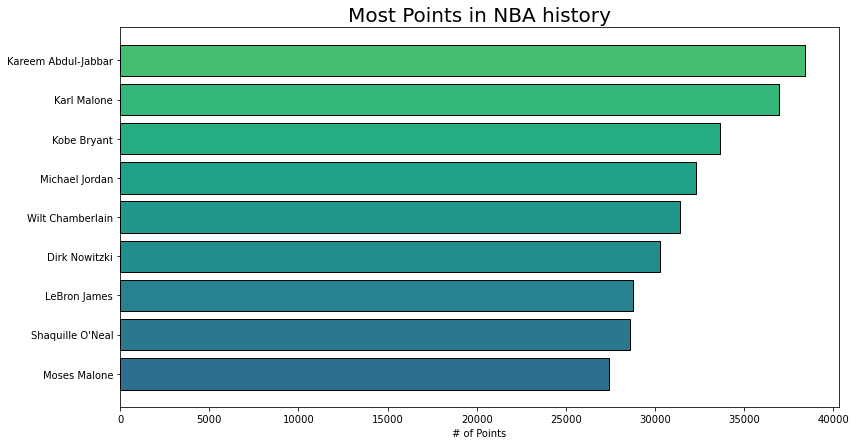

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
y_pos = np.arange(len(score['Player']))
ax.barh(score['Player'],score['PTS'],color=color,ec='black',capstyle='projecting')
ax.set_yticks(y_pos)
ax.set_xlabel('# of Points')
ax.invert_yaxis()
plt.tight_layout()
plt.title('Most Points in NBA history',fontsize=20)
plt.show()

Kareem Abdul-Jabbar is the NBA all time leader in points. With this stat alone you may think that he is the greatest because of it. However when played, between 1970 and 1989 , the leage average height started at 197 inches to 200 inches by the time he retired. Kareem stood 218 inches tall which was significatly taller thanmost of the League in his time. 

In [21]:
player_info_df = pd.read_csv('../data/Players.csv')

In [22]:
season_and_player_df = player_info_df.merge(Season_stats,on='Player')

In [23]:
def change_to_inches(num):
    num = round((num / 100000) * 39370 , 0)
    return num
    

In [24]:
season_and_player_df

,Unnamed: 0_x,Player,height,weight,collage,born,birth_city,birth_state,Unnamed: 0_y,Year,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,0,1950.0,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,314,1951.0,...,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
2,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1,1950.0,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
3,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,315,1951.0,...,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
4,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,489,1952.0,...,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22563,3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina,24674,2017.0,...,0.857,9.0,15.0,24.0,6.0,3.0,1.0,6.0,18.0,58.0
22564,3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon,24675,2017.0,...,0.500,4.0,6.0,10.0,2.0,3.0,1.0,5.0,4.0,13.0
22565,3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee,24688,2017.0,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
22566,3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany,24689,2017.0,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [35]:
year_and_height_df = season_and_player_df[['Year','height']].groupby((df3.Year//2)*10).mean().astype(int)
year_and_height_df.height = year_and_height_df.height.map(change_to_inches)
year_and_height_df.reset_index(drop=True,inplace=True)

In [36]:
year_and_height_df

,Year,height
0,1950,76.0
1,1952,76.0
2,1954,76.0
3,1956,77.0
4,1958,77.0
5,1960,77.0
6,1962,77.0
7,1964,78.0
8,1966,78.0
9,1968,78.0


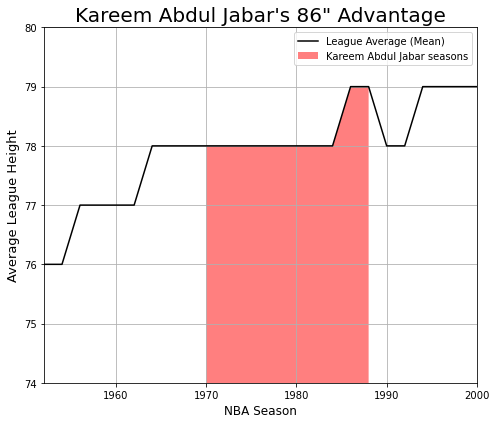

In [37]:

x = year_and_height_df['Year']
y = year_and_height_df['height']
a = np.array(x)
ab = np.where(np.logical_and(a>=1970,a<=1989))
a[ab]
b = np.array(y)
b[ab]
fig, ax = plt.subplots(figsize=(7,6))

ax.plot(x, y, color='black')
ax.fill_between(a[ab],b[ab],
                  facecolor='red', alpha=0.5)
ax.set_ylim(74,80)
ax.set_xlim(1952,2000)
# # plt.show()
# # Copy to clipboard
ax.set_ylabel("Average League Height",fontsize=13)
ax.set_xlabel('NBA Season',fontsize=12)
ax.legend(['League Average (Mean)','Kareem Abdul Jabar seasons'])
ax.set_title("Kareem Abdul Jabar's 86\" Advantage",fontsize=20)
ax.grid('on')
plt.tight_layout()
#plt.savefig('Kareem Abdul Advantage')
# add mean to league average

Karal Malone is holds the Record for most points for a PF in NBA Histroy. He was one of the best players to ever play the PF(Power forward) position.

In [42]:
pf = Season_stats[['Player','Pos','PTS']]
pf = pf[pf['Pos'] == 'PF']
pf_top_3 = pf.groupby('Player').sum().sort_values(by='PTS',ascending=False).head(3)
pf_top_3 = pf_top_3.reset_index()


In [43]:
pf

,Player,Pos,PTS
17,Bob Brannum,PF,713.0
23,Walt Budko,PF,595.0
41,Jack Coleman,PF,590.0
45,Dillard Crocker,PF,723.0
68,Joe Fulks*,PF,965.0
...,...,...,...
24675,Kyle Wiltjer,PF,13.0
24678,Christian Wood,PF,35.0
24680,Brandan Wright,PF,189.0
24685,Thaddeus Young,PF,814.0


Text(0.4, 0.95, 'Karl Malone had 10,127 more\n points than the next closest PF.')

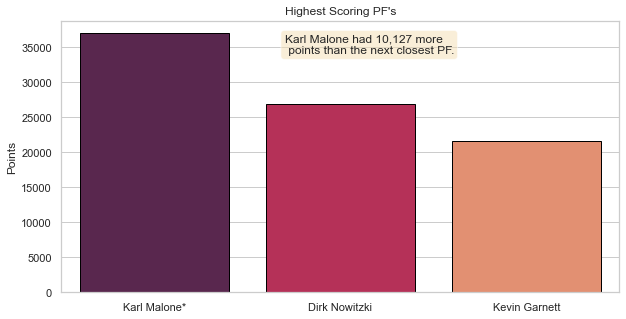

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=pf_top_3['PTS'],x=pf_top_3['Player'],palette='rocket',edgecolor='black')
ax.set_title('Highest Scoring PF\'s')
ax.set_xlabel('')
ax.set_ylabel('Points')
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.4, 0.95, 'Karl Malone had 10,127 more\n points than the next closest PF.', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)


The next two people in line are kobe bryant and michael jordan. Both players played the same position and were the same hight. How similar were they though. Compared to the rest of the leage greats they stand alone. But how about compared to eachother.

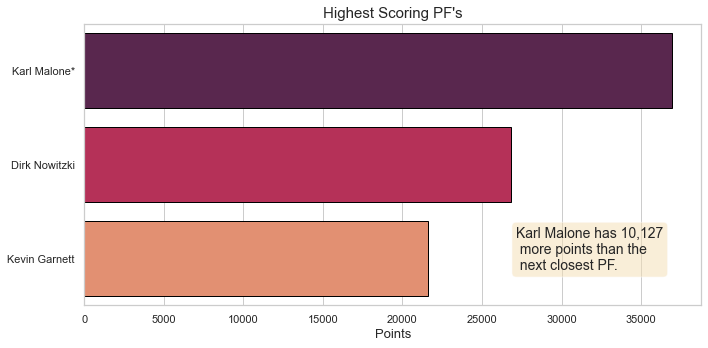

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=pf_top_3['Player'],x=pf_top_3['PTS'],palette='rocket',edgecolor='black',orient='h')
ax.set_title('Highest Scoring PF\'s',fontsize=15)
ax.set_xlabel('Points',fontsize=13)
ax.set_ylabel('')
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.7, 0.28, 'Karl Malone has 10,127\n more points than the\n next closest PF.', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.tight_layout()
#plt.savefig('Highest scoring Power Forward\'s')

In [50]:
# Finding the top players that were in the top 10 all time in points, steals, rebrounds, asists, blocks
height = season_and_player_df[season_and_player_df['height'] == 198.0]
points_ = height[['Player','PTS']].groupby('Player').sum().sort_values(by='PTS',ascending=False).head(10)
steals_ = height[['Player','STL']].groupby('Player').sum().sort_values(by='STL',ascending=False).head(10)
reb_ = height[['Player','TRB']].groupby('Player').sum().sort_values(by='TRB',ascending=False).head(10)
ast_ = height[['Player','AST']].groupby('Player').sum().sort_values(by='AST',ascending=False).head(10)
blk_ = height[['Player','BLK']].groupby('Player').sum().sort_values(by='BLK',ascending=False).head(10)

In [51]:
o = pd.concat([points_,steals_,reb_,ast_,blk_],axis=1,join='inner')

In [52]:
o

,PTS,STL,TRB,AST,BLK
Player,,,,,
Kobe Bryant,33643.0,1944.0,7047.0,6306.0,640.0
Michael Jordan*,32292.0,2514.0,6672.0,5633.0,893.0
Charles Barkley*,23757.0,1648.0,12546.0,4215.0,888.0


In [53]:
arr1 = np.array(o['PTS'])
lst1 = []
for num in arr1:
    a = arr1.sum()
    lst1.append(num / a)
print(lst1)
names = ['Kobe Bryant','Michael Jordan','Charles Barkley']
explode1 = (0.1,0,0)

arr2 = np.array(o['STL'])
lst2 = []
for num in arr2:
    a = arr2.sum()
    lst2.append(num / a)
print(lst2)
explode2 = (0,0.1,0)


arr3 = np.array(o['TRB'])
lst3 = []
for num in arr3:
    a = arr3.sum()
    lst3.append(num / a)
print(lst3)
explode3 = (0,0,0.1)


arr4 = np.array(o['AST'])
lst4 = []
for num in arr4:
    a = arr4.sum()
    lst4.append(num / a)
print(lst4)
explode4 = (0.1,0,0)


[0.3750947687642153, 0.36003210988716944, 0.26487312134861524]
[0.3183753684900098, 0.41172617097936454, 0.2698984605306256]
[0.2683038263849229, 0.25402627070245576, 0.47766990291262135]
[0.3903677107837068, 0.3487062027980686, 0.26092608641822457]


In [54]:
colors = ['darkviolet','tab:red','orange']

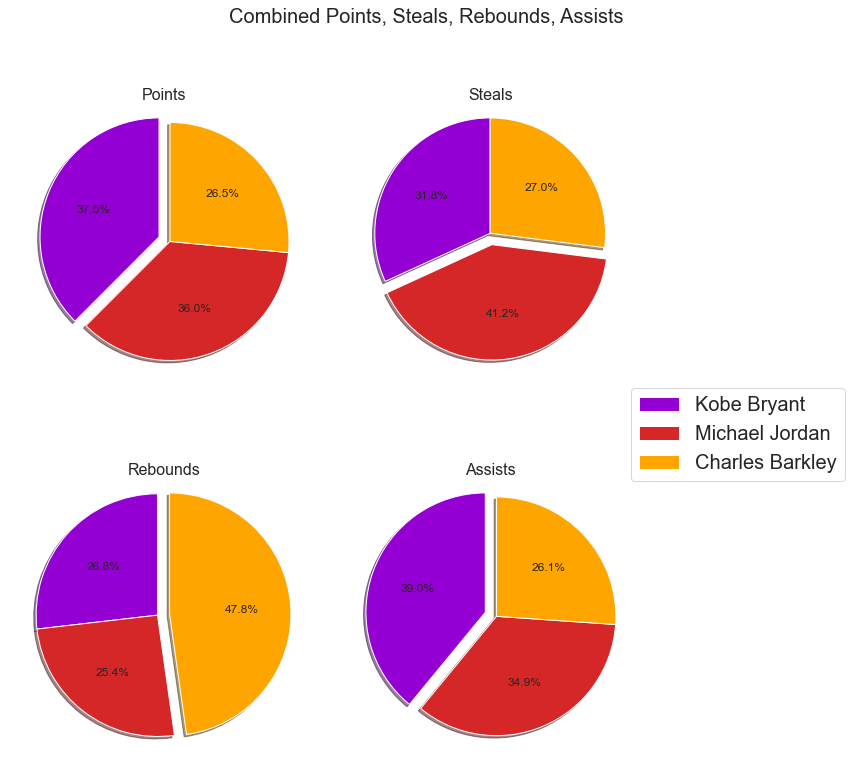

In [56]:
# Creating a pie chart of who ( MJ / Kobe/ Charles Barkley) had the most of each category
fig1, ax1 = plt.subplots(2,2,figsize=(12,10))

ax1[0,0].pie(lst1,colors=colors, explode=explode1, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1[0,0].set_title('Points',fontsize=16)
ax1[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax1[0,1].pie(lst2,colors=colors,explode=explode2,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0,1].set_title('Steals',fontsize=16)
ax1[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1[1,0].pie(lst3,colors=colors,explode=explode3,autopct='%1.1f%%',
        shadow=True, startangle=90,normalize=False)
ax1[1,0].set_title('Rebounds',fontsize=16)
ax1[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1[1,1].pie(lst4,colors=colors,explode=explode4,autopct='%1.1f%%',
        shadow=True, startangle=90,normalize=False)
ax1[1,1].set_title('Assists',fontsize=16)
ax1[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ttl = plt.suptitle('Combined Points, Steals, Rebounds, Assists',fontsize=20)
ttl.set_position([.5,1.05])
plt.legend(names,loc=(.95,1),prop={'size': 20})
plt.tight_layout()
#plt.savefig('Kobe MJ and Charles Barkley')
plt.show()


# Better by Points

### The main focus of this project is to compare Michael Jordan and Kobe Bryant. However as a spoiler, at the end I wanted to see how lebron compared to the "Winner" of the MJ and Kobe debate.

In [62]:
mj_lebron_kobe = pd.read_csv('../data/allgames_stats.csv')

In [63]:
mj_full = mj_lebron_kobe[mj_lebron_kobe['Player'] == 'Michael Jordan']
kobe_full = mj_lebron_kobe[mj_lebron_kobe['Player'] == 'Kobe Bryant']
lebron_full = mj_lebron_kobe[mj_lebron_kobe['Player'] == 'Lebron James']

In [64]:
def str_to_number(time_str):
    if not isinstance(time_str, str):
        return 0
    minutes, sec, *_ = [int(x) for x in time_str.split(':')]
    return minutes + sec / 60


In [65]:
mj_full.MP = mj_full.MP.map(str_to_number)
kobe_full.MP = kobe_full.MP.map(str_to_number)
lebron_full.MP = lebron_full.MP.map(str_to_number)

/Users/AlexMartinez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [66]:
#Only took the games where players played moore than 25 minutes in a game.
mj_over_20min = mj_full[mj_full['MP'] > 20]
kobe_over_20min = kobe_full[kobe_full['MP'] > 20]
lebron_over_20min = lebron_full[lebron_full['MP'] > 20]

In [67]:
mj_pts = mj_over_20min['PTS'].dropna()
kobe_pts = kobe_over_20min['PTS'].dropna()

In [68]:
x = stats.ttest_ind(kobe_pts,mj_pts)
x

Ttest_indResult(statistic=-12.14347959783353, pvalue=4.4125241537750846e-33)

# Man Whitney Test

In [69]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [70]:
mj_wins_pts = count_winning_pairs(mj_pts, kobe_pts)
kobe_wins_pts = count_winning_pairs(kobe_pts, mj_pts)
print("Number of MJ Wins: {}".format(mj_wins_pts))
print("Number of Kobe Wins: {}".format(kobe_wins_pts)) 

Number of MJ Wins: 1163381.5
Number of Kobe Wins: 663422.5


In [71]:
res = stats.mannwhitneyu(mj_pts, kobe_pts, alternative="greater")
print(res)
print("p-value for MJ < Kobe: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=1163381.5, pvalue=4.5404005782192395e-35)
p-value for MJ < Kobe: 0.000


# Better by Rebounds

- A rebound is awarded to a player who retrieves the ball after a missed field goal or free throw. These can be awarded on both offence and defense and can be extremely important in a single game

In [72]:
mj_reb = mj_over_20min['TRB']
kobe_reb = kobe_over_20min['TRB']

In [73]:
y = stats.ttest_ind(kobe_reb,mj_reb)
y

Ttest_indResult(statistic=-7.948122327547394, pvalue=2.7486057812105945e-15)

In [74]:
res2 = stats.mannwhitneyu(mj_reb, kobe_reb, alternative="greater")
print(res2)
print("p-value for MJ < Kobe: {:2.3f}".format(res2.pvalue))

MannwhitneyuResult(statistic=1073599.0, pvalue=1.0903906067324378e-14)
p-value for MJ < Kobe: 0.000


In [75]:
mj_wins_reb = count_winning_pairs(mj_reb, kobe_reb)
kobe_wins_reb = count_winning_pairs(kobe_reb, mj_reb)
print("Number of MJ Wins: {}".format(mj_wins_reb))
print("Number of Kobe Wins: {}".format(kobe_wins_reb)) 

Number of MJ Wins: 1073599.0
Number of Kobe Wins: 763593.0


# Better by assists

In [76]:
mj_ast = mj_over_20min['AST']
kobe_ast = kobe_over_20min['AST']

In [77]:
z = stats.ttest_ind(kobe_ast,mj_ast)
z

Ttest_indResult(statistic=-4.3567781310809925, pvalue=1.3688054607231231e-05)

In [78]:
res3 = stats.mannwhitneyu(mj_ast, kobe_ast, alternative="greater")
print(res3)
print("p-value for MJ < Kobe: {:2.3f}".format(res3.pvalue))

MannwhitneyuResult(statistic=1006312.5, pvalue=7.588436524517679e-06)
p-value for MJ < Kobe: 0.000


In [79]:
mj_wins_ast = count_winning_pairs(mj_ast, kobe_ast)
kobe_wins_ast = count_winning_pairs(kobe_ast, mj_ast)
print("Number of MJ Wins: {}".format(mj_wins_ast))
print("Number of Kobe Wins: {}".format(kobe_wins_ast))

Number of MJ Wins: 1006312.5
Number of Kobe Wins: 830879.5


# Better overall GmSc in carear

GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV. Game Score was created by John Hollinger to give a rough measure of a player's productivity for a single game.

In [80]:
mj_gmsc = mj_over_20min['GmSc'].dropna()
kobe_gmsc = kobe_over_20min['GmSc'].dropna()

In [81]:
g = stats.ttest_ind(mj_gmsc,kobe_gmsc)
g

Ttest_indResult(statistic=13.517910169128047, pvalue=2.9413250225125603e-40)

In [82]:
res4 = stats.mannwhitneyu(mj_gmsc, kobe_gmsc, alternative="greater")
print(res4)
print("p-value for MJ < Kobe: {:2.3f}".format(res4.pvalue))

MannwhitneyuResult(statistic=1023460.5, pvalue=8.970248616618039e-41)
p-value for MJ < Kobe: 0.000


In [83]:
mj_wins_gmsc = count_winning_pairs(mj_gmsc, kobe_gmsc)
kobe_wins_gmsc = count_winning_pairs(kobe_gmsc, mj_gmsc)
print("Number of MJ Wins: {}".format(mj_wins_gmsc))
print("Number of Kobe Wins: {}".format(kobe_wins_gmsc))

Number of MJ Wins: 1023460.5
Number of Kobe Wins: 539191.5


# Win to Loss comparison

- Winning and losing in basketball is something people bring up in these debates however winning and loosing doesnt fall on the shoulder of just one player. Its a team game. But players like Kobe and MJ do have an impact on the games they play in. So we will be comparing thier wins and losses to each other

In [84]:
def wins_losses_to_num(res):
    if res == 'W':
        return 1
    else:
        return 0
    
    

In [85]:
mj_w_l = mj_over_20min.Result.map(wins_losses_to_num)
kobe_w_l = kobe_over_20min.Result.map(wins_losses_to_num)

In [86]:
l = stats.ttest_ind(mj_w_l,kobe_w_l)
l

Ttest_indResult(statistic=2.3679163356016453, pvalue=0.017958149062341604)

In [87]:
res5 = stats.mannwhitneyu(mj_w_l, kobe_w_l, alternative="greater")
print(res5)
print("p-value for MJ < Kobe: {:2.3f}".format(res5.pvalue))

MannwhitneyuResult(statistic=958794.0, pvalue=0.008993519069513713)
p-value for MJ < Kobe: 0.009


In [88]:
mj_wins_w_l = count_winning_pairs(mj_w_l, kobe_w_l)
kobe_wins_w_l = count_winning_pairs(kobe_w_l, mj_w_l)
print("Number of MJ Wins: {}".format(mj_wins_w_l))
print("Number of Kobe Wins: {}".format(kobe_wins_w_l))

Number of MJ Wins: 958794.0
Number of Kobe Wins: 878398.0


# Steals

In [89]:
mj_stl = mj_over_20min['STL'].dropna()
kobe_stl = kobe_over_20min['STL'].dropna()

In [90]:
s = stats.ttest_ind(mj_stl,kobe_stl)
s

Ttest_indResult(statistic=14.252221251995884, pvalue=1.6934740027655064e-44)

In [91]:
res6 = stats.mannwhitneyu(mj_stl, kobe_stl, alternative="greater")
print(res6)
print("p-value for MJ < Kobe: {:2.3f}".format(res6.pvalue))

MannwhitneyuResult(statistic=1178309.5, pvalue=5.7116491805132094e-42)
p-value for MJ < Kobe: 0.000


In [92]:
mj_wins_stl = count_winning_pairs(mj_stl, kobe_stl)
kobe_wins_stl = count_winning_pairs(kobe_stl, mj_stl)
print("Number of MJ Wins: {}".format(mj_wins_stl))
print("Number of Kobe Wins: {}".format(kobe_wins_stl))

Number of MJ Wins: 1178309.5
Number of Kobe Wins: 642558.5


# Blocks

In [93]:
mj_blk = mj_over_20min['BLK'].dropna()
kobe_blk = kobe_over_20min['BLK'].dropna()

In [94]:
res7 = stats.mannwhitneyu(mj_blk, kobe_blk, alternative="greater")
print(res6)
print("p-value for MJ < Kobe: {:2.3f}".format(res7.pvalue))

MannwhitneyuResult(statistic=1178309.5, pvalue=5.7116491805132094e-42)
p-value for MJ < Kobe: 0.000


In [95]:
mj_wins_blk = count_winning_pairs(mj_blk, kobe_blk)
kobe_wins_blk = count_winning_pairs(kobe_blk, mj_blk)
print("Number of MJ Wins: {}".format(mj_wins_blk))
print("Number of Kobe Wins: {}".format(kobe_wins_blk))

Number of MJ Wins: 1086752.5
Number of Kobe Wins: 748955.5


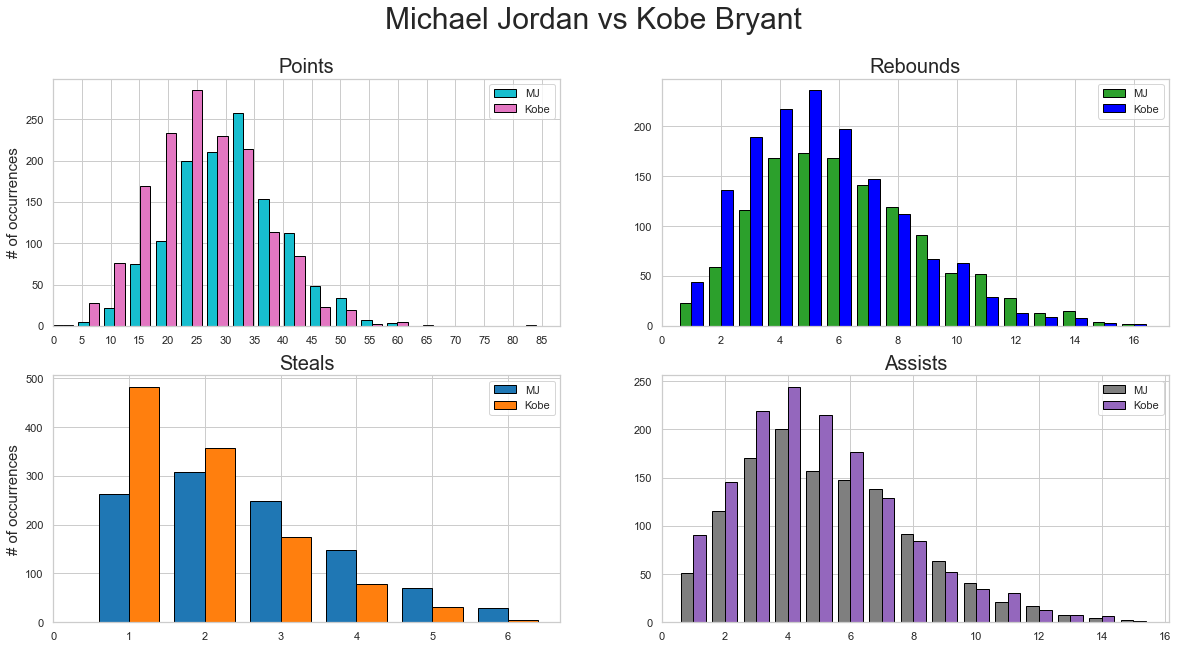

In [96]:
m = mj_over_20min['PTS']
k = kobe_over_20min['PTS']

mr = mj_over_20min['TRB']
kr = kobe_over_20min['TRB']

ms = mj_over_20min['STL']
ks = kobe_over_20min['STL']

ma = mj_over_20min['AST']
ka = kobe_over_20min['AST']

plt.style.use('seaborn-muted')

# x = m
# y = k
bins = np.linspace(0, 85, 20) - 0.5
bins2 = np.linspace(1,17,17) - 0.5
bins3 = np.linspace(1,7,7) - 0.5
bins4 = np.linspace(1,16,16) - 0.5
# plt.hist([x, y], bins, label=['MJ', 'Kobe'])
# plt.legend(loc='upper right')
# plt.xlabel('Points in Game')
# plt.title('Carear Games Over 20 minutes')
# plt.show()


fig, axs = plt.subplots(2, 2,figsize=(20,10))

axs[0, 0].hist([m, k],bins,color=['tab:cyan','tab:pink'],edgecolor='black')
axs[0, 0].set_title('Points',fontsize=20)
axs[0,0].set_xticks(range(0,86,5))
axs[0, 0].legend(['MJ','Kobe'])
axs[0,0].grid('on')
axs[0,0].set_ylabel('# of occurrences',fontsize=15)
axs[0,0].set_xlim(xmin=0)


axs[0, 1].hist([mr, kr],bins2,color=['tab:green','blue'],edgecolor='black')
axs[0, 1].set_title('Rebounds',fontsize=20)
#axs[0,1].set_facecolor('tab:grey')
axs[0, 1].legend(['MJ','Kobe'])
axs[0,1].grid('on')
axs[0,1].set_xlim(xmin=0)

axs[1, 0].hist([ms, ks], bins3,color=['tab:blue','tab:orange'],edgecolor='black')
axs[1, 0].set_title('Steals',fontsize=20)
#axs[1,0].set_facecolor('tab:grey')
axs[1, 0].legend(['MJ','Kobe'])
axs[1,0].grid('on')
axs[1,0].set_ylabel('# of occurrences',fontsize=15)
axs[1,0].set_xlim(xmin=0)


axs[1, 1].hist([ma, ka],bins4,color=['tab:grey','tab:purple'],edgecolor='black')
axs[1, 1].set_title('Assists',fontsize=20)
# axs[1,1].set_facecolor('black')
axs[1, 1].legend(['MJ','Kobe'])
axs[1,1].grid('on')
axs[1,1].set_xlim(xmin=0)

plt.suptitle('Michael Jordan vs Kobe Bryant',fontsize=30)
# for ax in axs.flat:
#     ax.label_outer()
# plt.tight_layout()
plt.grid('on')
#plt.savefig('Histograms comparing MJ and Kobe Stats')
plt.show()

In [97]:
lebron = mj_lebron_kobe[mj_lebron_kobe['Player'] == 'Lebron James']

In [98]:


leb_pts = lebron['PTS'].dropna()
leb_ast = lebron['AST'].dropna()
leb_reb = lebron['TRB'].dropna()
leb_stl = lebron['STL'].dropna()
leb_blk = lebron['BLK'].dropna()

mj_blk = mj_full['BLK']
mj_pt = mj_full['PTS']
mj_as = mj_full['AST']
mj_re = mj_full['TRB']

In [99]:
res8 = stats.mannwhitneyu(mj_reb, leb_reb, alternative="greater")
print(res8)
print("p-value for MJ having less rebounds than Lebron: {:2.3f}".format(res8.pvalue))

MannwhitneyuResult(statistic=655709.0, pvalue=1.0)
p-value for MJ having less rebounds than Lebron: 1.000


In [100]:
leb_reb.sum()

11002

In [101]:
mj_reb.sum()

7790

In [102]:
r1 = stats.mannwhitneyu(mj_pt, leb_pts, alternative="greater")
print(r1)
print("p-value for MJ scoring less than Lebron: {:2.3f}".format(r1.pvalue))
# r2 = stats.mannwhitneyu(mj_ast, leb_ast, alternative="greater")
# print(r2)
# print("p-value for MJ < lebron: {:2.3f}".format(r2.pvalue))
# r3 = stats.mannwhitneyu(mj_reb, leb_reb, alternative="greater")
# print(r3)
# print("p-value for MJ < lebron: {:2.3f}".format(r3.pvalue))
# r4 = stats.mannwhitneyu(mj_stl, leb_stl, alternative="greater")
# print(r4)
# print("p-value for MJ < lebron: {:2.3f}".format(r4.pvalue))
r5 = stats.mannwhitneyu(mj_blk, leb_blk, alternative="greater")
print(r5)
print("p-value for MJ having less blocks than Lebron: {:2.3f}".format(r5.pvalue))

MannwhitneyuResult(statistic=1080113.5, pvalue=4.141998780208815e-20)
p-value for MJ scoring less than Lebron: 0.000
MannwhitneyuResult(statistic=904453.0, pvalue=0.3815065662851238)
p-value for MJ having less blocks than Lebron: 0.382


As of 2017 comparing total Blocks for Michael Jordan and LeBron James we fail to reject the null hypothesis that MJ will get less blocks than lebron.

In [103]:
lebron_mj_blocks = Season_stats[['Player','BLK']].groupby('Player').sum().sort_values(by='BLK',ascending=False).reset_index()

In [104]:
lb = lebron_mj_blocks[lebron_mj_blocks['Player'] == 'LeBron James']

In [105]:
lb

,Player,BLK
127,LeBron James,817.0


In [106]:
mb = lebron_mj_blocks[lebron_mj_blocks['Player'] == 'Michael Jordan*']

In [107]:
mb

,Player,BLK
107,Michael Jordan*,893.0


In [108]:
Stat = ['Points','Assists','Rebounds','Steals','Blocks','Wins/Losses','Game Score']
end_df = pd.DataFrame({'MJ Wins': [mj_wins_pts,mj_wins_ast,mj_wins_reb,mj_wins_stl,mj_wins_blk,mj_wins_w_l,mj_wins_gmsc ],
                      'Kobe Wins': [kobe_wins_pts,kobe_wins_ast,kobe_wins_reb,kobe_wins_stl,kobe_wins_blk,kobe_wins_w_l,kobe_wins_gmsc ]}
                      , index=Stat)
end_df['Total Comparisons'] = end_df['MJ Wins'] + end_df['Kobe Wins']
end_df['P-Value'] = ["{:2.3f}".format(res.pvalue),
                     "{:2.3f}".format(res3.pvalue),
                     "{:2.3f}".format(res2.pvalue),
                     "{:2.3f}".format(res6.pvalue),
                     "{:2.3f}".format(res7.pvalue),
                     "{:2.3f}".format(res5.pvalue),
                     "{:2.3f}".format(res4.pvalue)]

In [109]:
end_df

,MJ Wins,Kobe Wins,Total Comparisons,P-Value
Points,1163381.5,663422.5,1826804.0,0.000
Assists,1006312.5,830879.5,1837192.0,0.000
Rebounds,1073599.0,763593.0,1837192.0,0.000
Steals,1178309.5,642558.5,1820868.0,0.000
Blocks,1086752.5,748955.5,1835708.0,0.000
Wins/Losses,958794.0,878398.0,1837192.0,0.009
Game Score,1023460.5,539191.5,1562652.0,0.000


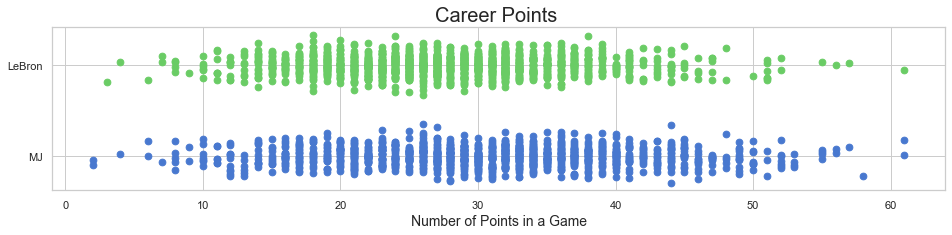

In [110]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(mj_pt, np.repeat(0, len(mj_pt)) + np.random.normal(0, 0.1, len(mj_pt)), s=45)
ax.scatter(leb_pts, np.repeat(1, len(leb_pts)) + np.random.normal(0, 0.1, len(leb_pts)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["MJ", "LeBron"])
ax.set_xlabel('Number of Points in a Game',fontsize=14)
ax.set_title('Career Points ',fontsize=20)
plt.savefig('Lebron MJ Total career points')

In [111]:
r1 = stats.mannwhitneyu(mj_pt, leb_pts, alternative="greater")
print(r1)
print("p-value for MJ scoring less than Lebron: {:2.3f}".format(r1.pvalue))

MannwhitneyuResult(statistic=1080113.5, pvalue=4.141998780208815e-20)
p-value for MJ scoring less than Lebron: 0.000


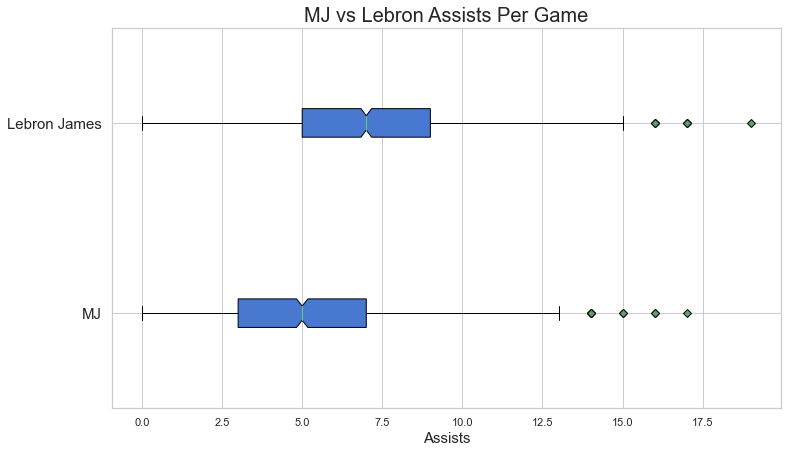

In [112]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots(1, figsize=(12, 7))
b1 = np.linspace(0,17,17)
ax.boxplot([mj_full['AST'],leb_ast],notch=True,flierprops=green_diamond,vert=False,patch_artist=True)
# ax.hist(leb_ast,alpha=0.5)
# ax.set_xlim(xmin=0)
ax.set_yticklabels(['MJ','Lebron James'],fontsize=15)
# ax.bar(leb_blk,len(leb_blk),alpha=0.5)
#ax.legend(['MJ','Lebron'])
ax.set_title('MJ vs Lebron Assists Per Game',fontsize=20)
ax.set_xlabel('Assists',fontsize=15)
plt.savefig('MJ Lebron Assists Per game')

In [113]:
r5 = stats.mannwhitneyu(mj_blk, leb_blk, alternative="greater")
print(r5)
print("p-value for MJ having rebounds blocks than Lebron: {:2.3f}".format(r5.pvalue))

MannwhitneyuResult(statistic=904453.0, pvalue=0.3815065662851238)
p-value for MJ having rebounds blocks than Lebron: 0.382


In [114]:
r3 = stats.mannwhitneyu(mj_ast, leb_ast, alternative="greater")
print(r3)
print("p-value for MJ scoring less than Lebron: {:2.3f}".format(r3.pvalue))

MannwhitneyuResult(statistic=563292.0, pvalue=1.0)
p-value for MJ scoring less than Lebron: 1.000
